# Capstone Project - The Battle of Neighborhoods - Week Two
### Applied Data Science Capstone 

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Description](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)

* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

#### *Description & Disscusion of the Background:*

**Mumbai is the financial capital of India.** People from all over India come to Mumbai to earn a livelihood. Due to this, the population of Mumbai has increased tremendously. With the increase in population comes the problem of housing. As the demand of housing increases so do the prices. As residential property rate's
increase it will get difficult for the normal or say middle income group people to buy their own house in the city.

They will have to travel from the outskirts of the city which is very time consuming and the facilities there are not upto the mark. That is there are no shopping malls there, less number of quality schools, colleges, hospitals and restaurents and so on. 

**So Investors want to find out places in Mumbai where there could develop residential buildings which could be affordable to the middle income group people.** These places should be low in rates when compared to other places in the city and should have good connectivity to all the facilities.

We will create maps and using Foursquare API will explore these low price rate neighbourshoods and find out whether all the facilities are available to them. Thus Investors will be confident that their products that is the residential buildings will have a good chance of being sold out. 


## Data Description <a name="data"></a>

We have collected the data of location and property rates per square feet from the website 'https://www.mumbaipropertyexchange.com/research/mumbai-property-rates'.
We have filtered out **30 locations which are uniformly distributed in the city of Mumbai** from this website.

As the latitudes and longitudes of these places were not readily available we have individually searched for their latitudes and longitudes and added them to our database.

**The above data will help us to solve our problems as follow:**

* The per square feet rate prices of residential buildings will help us to find the places **where the rates are less** when compared to the other parts of the city.

*  **Using Foursquare API,** the latitudes and longitudes will help us to explore these location and decide whether these places are suitable for affordable housing.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

#### We have taken the location and price from 'https://www.mumbaipropertyexchange.com/research/mumbai-property-rates'
Latitude and Longitude cordinnates are taken from the internet.

In [3]:
dict={"Neighborhood":[ 'Kurla','Chembur','Mankhurd','Ghatkopar','Vikhroli','Kanjurmarg','Powai','Bhandup','Mulund','Worli','Borivali',
    'Cuffe Parade','Bandra','Churgate','Andheri','Goregaon','Marine Drive','Nariman Point','Colaba','Mumbai Central','Mahalaxmi',
     'Prabhadevi','Byculla','Dadar','Wadala','Sion','Parel','Mahim','Matunga','Kandevali' ], 
    'Price_per_sqft': [ 14200, 21500, 13000, 18000, 17200, 14600, 25000, 12000, 16000, 40000,15000, 62000, 42000, 52000, 26000, 19500, 53000, 92000, 45000, 39000, 
     46000, 37000, 28800, 35000, 21500, 21000, 32000, 34000, 32000, 15000 ], 
   "Latitude":[ 19.0726, 19.0522, 19.0558, 19.0790, 19.0922, 19.1294,19.1197, 19.1511, 19.1726, 18.9986, 19.2307, 18.9127, 19.0596, 18.9322, 19.1136, 19.1663, 18.9431, 18.9256, 18.9067, 18.9690,  18.9865, 19.0163,
     18.9750, 19.0178, 19.0149, 19.0390, 18.9977, 19.0354, 19.0269, 19.1998 ], 
     "Longitude":[72.8845, 72.9005, 72.9282, 72.9080, 72.9189, 72.9330, 72.9052, 72.9372, 72.9425, 72.8174, 72.8567, 72.8213, 72.8295, 72.8264, 72.8697, 72.8526, 72.8272, 72.8242, 72.8147, 72.8205, 72.8183,
    72.8291, 72.8295, 72.8478, 72.8631, 72.8619, 72.8376, 72.8423, 72.8553, 72.8426 ]}                                                                                                                                                  

In [4]:
df=pd.DataFrame(dict)
df.head()

,Neighborhood,Price_per_sqft,Latitude,Longitude
0,Kurla,14200,19.0726,72.8845
1,Chembur,21500,19.0522,72.9005
2,Mankhurd,13000,19.0558,72.9282
3,Ghatkopar,18000,19.0790,72.9080
4,Vikhroli,17200,19.0922,72.9189


## Methodology <a name="methodology"></a>

We have got the data of the neighborhoods of Mumbai like price per square feet, latitudes and longitudes.

Using these latitudes and longitudes we can use folium fuction CircleMarker to see their location on the map of Mumbai.

This will help us to visualize the distribution of neighborhood's of Mumbai on the map.

We will then plot bar charts with Price per Square feet and neighborhoods to see the price distribution of each neighborhood.

We will then sort the data as per price per square feet in ascending order to get the top 7 neighborhoods with the lowest rates
and then perform the Analysis on them.

We will use Foursquare API to explore the 7 neighborhoods to find out as to how many venues are located around each one of them.

By combination of price per square feet and number of venues surrounding a neighborhood we will decide the final result.

In [5]:
# create map of Mumbai using latitude and longitude values
map_mum = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum)  
    
map_mum

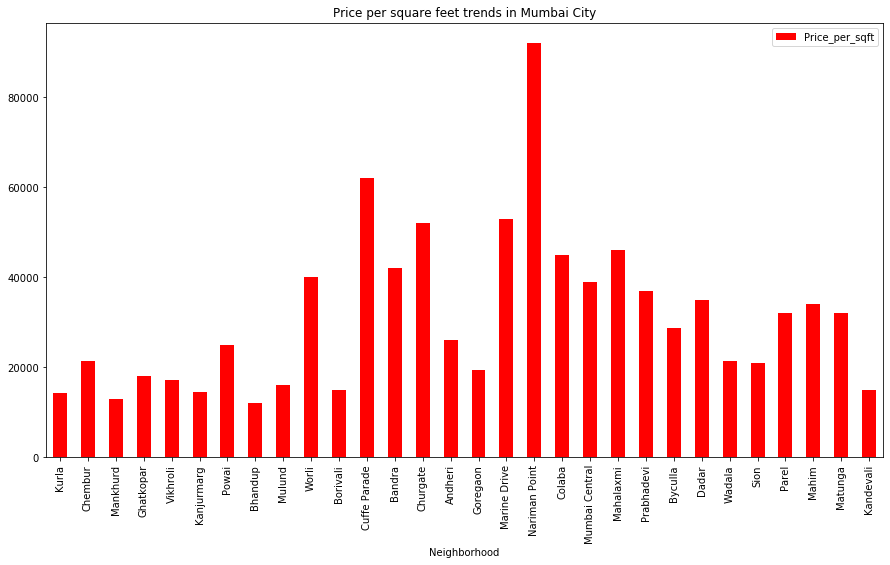

In [6]:
#Visualization of the price trends of all the neighbourhoods
df.plot(kind='bar',x='Neighborhood', y= 'Price_per_sqft', figsize=(15,8), color='Red')
plt.title('Price per square feet trends in Mumbai City') # add title to the plot
plt.show()

Sorting the data with respect to price per square feet.

In [7]:
df.sort_values(by ='Price_per_sqft', axis=0, inplace=True)
df.head()

,Neighborhood,Price_per_sqft,Latitude,Longitude
7,Bhandup,12000,19.1511,72.9372
2,Mankhurd,13000,19.0558,72.9282
0,Kurla,14200,19.0726,72.8845
5,Kanjurmarg,14600,19.1294,72.9330
10,Borivali,15000,19.2307,72.8567


In [8]:
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df.head(10)

,Neighborhood,Price_per_sqft,Latitude,Longitude
0,Bhandup,12000,19.1511,72.9372
1,Mankhurd,13000,19.0558,72.9282
2,Kurla,14200,19.0726,72.8845
3,Kanjurmarg,14600,19.1294,72.9330
4,Borivali,15000,19.2307,72.8567
5,Kandevali,15000,19.1998,72.8426
6,Mulund,16000,19.1726,72.9425
7,Vikhroli,17200,19.0922,72.9189
8,Ghatkopar,18000,19.0790,72.9080
9,Goregaon,19500,19.1663,72.8526


We will select the top 7 Neighborhoods with the lowest price_per_sqft for our analysis

In [9]:
df1=df.iloc[0:7,0:5]
df1

,Neighborhood,Price_per_sqft,Latitude,Longitude
0,Bhandup,12000,19.1511,72.9372
1,Mankhurd,13000,19.0558,72.9282
2,Kurla,14200,19.0726,72.8845
3,Kanjurmarg,14600,19.1294,72.9330
4,Borivali,15000,19.2307,72.8567
5,Kandevali,15000,19.1998,72.8426
6,Mulund,16000,19.1726,72.9425


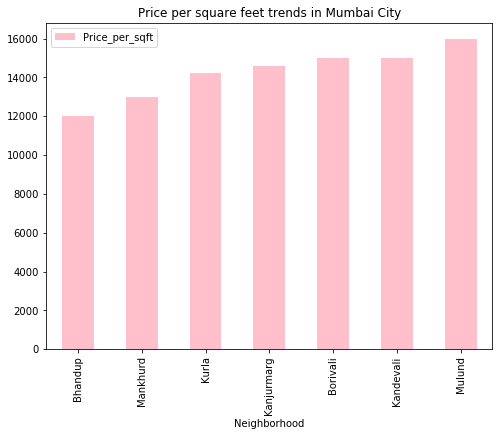

In [10]:
#Visualization of the price trends of all the neighbourhoods
df1.plot(kind='bar',x='Neighborhood', y= 'Price_per_sqft', figsize=(8,6), color='Pink')
plt.title('Price per square feet trends in Mumbai City') # add title to the plot
plt.show()

## Analysis <a name="analysis"></a>

Lets see where our seven neighborhoods are located in the city of Mumbai

In [11]:
# create map of Mumbai using latitude and longitude values
map_mum = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df1['Latitude'], df1['Longitude'], df1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum)  
    
map_mum

We can see that 2 neighborhoods are located in the northern part of Mumbai City while 3 are in the north east part and the remaining 2
are some what in central part.

**Northern Part of Mumbai City**
* Kandevali - 15,000 per sqft rate
* Borivali - 15,000 per sqft rate

**North Eastern Part of Mumbai City**
* Bhandup - 12,000 per sqft rate
* kanjurmarg - 14,600 per sqft 
* Mulund - 16,000 per sqft rate

**Central Eastern Part of Mumbai City**
* Kurla - 14,200 per sqft rate
* Mankhurd - 13,000 per sqft rate

We have come to know that **Bhandup is the neighborhood where the price per sqft is lowest** but does it meet our second criteria of having all the facilities.

_Lets Find out._

**Foursquare API credential**

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Lets explore our first neighborhood

In [13]:
df1.loc[0, 'Neighborhood']

'Bhandup'

In [14]:
neighborhood_latitude = df1.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df1.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df1.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bhandup are 19.1511, 72.9372.


## Now lets use Foursquare API to solve our problem

#### Now, let's get the venues that are in Bhandup within a radius of 1500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 1500 # define radius


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=ULNZCDXNGCHLV5QJ5PTZKMPU11JZ4XOLYZ1KFZJTXH3U3HUD&client_secret=1E2C4IDY5X5FWF1RHD4BG0QCXSQW2TTT1QWCZXS5TT2ZSF4C&v=20180605&ll=19.1511,72.9372&radius=1500&limit=100'

Send the GET request and examine the resutls

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d831e82a87921002cd563f6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mumbai',
  'headerFullLocation': 'Mumbai',
  'headerLocationGranularity': 'city',
  'totalResults': 29,
  'suggestedBounds': {'ne': {'lat': 19.164600013500014,
    'lng': 72.95146423735802},
   'sw': {'lat': 19.137599986499986, 'lng': 72.92293576264198}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '508794e9e4b092a5bcd2f381',
       'name': "Natural's",
       'location': {'address': 'Shop No 3, Mayuresh Srishti',
        'crossStreet': 'L.B.S Marg',
        'lat': 19.158354974933925,
        'lng': 72.93753540296169,
        'labeledLatLngs': [{'label': 'display',
  

We know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Natural's,Ice Cream Shop,19.158355,72.937535
1,Bageecha,Indian Restaurant,19.144922,72.937714
2,Gopala's Next,Restaurant,19.156164,72.937616
3,Cafe Maaz,Café,19.161639,72.937510
4,Pizza Hut,Pizza Place,19.141478,72.931128


Venues returned by Foursquare

In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

29 venues were returned by Foursquare.


### Similarly lets create a function to see all the venues near each of these Locations

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Creating new dataframe mumbai_venues

In [21]:
mumbai_venues = getNearbyVenues(names=df1['Neighborhood'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                                  )


Bhandup
Mankhurd
Kurla
Kanjurmarg
Borivali
Kandevali
Mulund


Lets check the size of our new Dataframe

In [22]:
print(mumbai_venues.shape)
mumbai_venues.head()

(310, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bhandup,19.1511,72.9372,Natural's,19.158355,72.937535,Ice Cream Shop
1,Bhandup,19.1511,72.9372,Bageecha,19.144922,72.937714,Indian Restaurant
2,Bhandup,19.1511,72.9372,Gopala's Next,19.156164,72.937616,Restaurant
3,Bhandup,19.1511,72.9372,Cafe Maaz,19.161639,72.937510,Café
4,Bhandup,19.1511,72.9372,Pizza Hut,19.141478,72.931128,Pizza Place


Let's check how many venues were returned for each neighborhood

In [23]:
mumbai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bhandup,29,29,29,29,29,29
Borivali,83,83,83,83,83,83
Kandevali,74,74,74,74,74,74
Kanjurmarg,30,30,30,30,30,30
Kurla,25,25,25,25,25,25
Mankhurd,9,9,9,9,9,9
Mulund,60,60,60,60,60,60


#### Lets see how many unique categories we have got

In [24]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 86 uniques categories.


##  Analyze Each Neighborhood

In [25]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighborhood,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Breakfast Spot,Burger Joint,Bus Station,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gift Shop,Gym,Gym / Fitness Center,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Juice Bar,Lighthouse,Lounge,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Mountain,Mughlai Restaurant,Multiplex,Park,Pet Store,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Sporting Goods Shop,Sports Bar,Theater,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,Bhandup,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bhandup,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bhandup,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bhandup,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bhandup,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
mumbai_onehot.shape

(310, 87)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped

,Neighborhood,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Breakfast Spot,Burger Joint,Bus Station,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gift Shop,Gym,Gym / Fitness Center,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Juice Bar,Lighthouse,Lounge,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Mountain,Mughlai Restaurant,Multiplex,Park,Pet Store,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Sporting Goods Shop,Sports Bar,Theater,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,Bhandup,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.00,0.000000,0.000000,0.034483,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.103448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.034483,0.206897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.034483,0.034483,0.000000,0.068966,0.000000,0.00,0.000000,0.000000,0.034483,0.103448,0.00,0.000000,0.000000,0.000000,0.00,0.034483,0.000000,0.000000,0.034483,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000
1,Borivali,0.000000,0.000000,0.000000,0.024096,0.000000,0.012048,0.00,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.012048,0.024096,0.072289,0.060241,0.036145,0.012048,0.012048,0.000000,0.000000,0.000000,0.012048,0.012048,0.024096,0.012048,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.036145,0.012048,0.012048,0.000000,0.00,0.084337,0.108434,0.012048,0.000000,0.012048,0.012048,0.012048,0.012048,0.00,0.000000,0.012048,0.000000,0.00,0.000000,0.012048,0.012048,0.024096,0.000000,0.00,0.000000,0.012048,0.000000,0.048193,0.00,0.048193,0.012048,0.012048,0.00,0.000000,0.024096,0.012048,0.000000,0.012048,0.000000,0.024096,0.012048,0.000000,0.000000
2,Kandevali,0.013514,0.000000,0.013514,0.000000,0.000000,0.000000,0.00,0.040541,0.013514,0.027027,0.013514,0.000000,0.000000,0.000000,0.013514,0.013514,0.013514,0.027027,0.054054,0.000000,0.040541,0.000000,0.013514,0.000000,0.000000,0.000000,0.027027,0.000000,0.013514,0.094595,0.000000,0.013514,0.013514,0.000000,0.013514,0.027027,0.000000,0.000000,0.000000,0.013514,0.013514,0.00,0.000000,0.027027,0.027027,0.000000,0.000000,0.00,0.040541,0.081081,0.000000,0.000000,0.040541,0.000000,0.000000,0.027027,0.00,0.000000,0.000000,0.000000,0.00,0.013514,0.013514,0.000000,0.013514,0.013514,0.00,0.000000,0.000000,0.027027,0.040541,0.00,0.000000,0.013514,0.013514,0.00,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.027027,0.013514,0.000000,0.013514
3,Kanjurmarg,0.000000,0.033333,0.000000,0.066667,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.00,0.033333,0.033333,0.000000,0.000000,0.000000,0.00,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.033333,0.000000,0.000000,0.066667,0.000

In [28]:
mumbai_grouped.shape

(7, 87)

#### Let's print each neighborhood along with the top 10 most common venues

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(7)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bhandup,Indian Restaurant,Restaurant,Café,Train Station,Pizza Place,Bar,Department Store,Fried Chicken Joint,Park,Ice Cream Shop
1,Borivali,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Restaurant,Sandwich Place,Gym,Clothing Store,Pizza Place,Bakery
2,Kandevali,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Ice Cream Shop,Bakery,Italian Restaurant,Restaurant,Coffee Shop,Lounge,Gym / Fitness Center
3,Kanjurmarg,Train Station,Indian Restaurant,Café,Asian Restaurant,Pizza Place,Coworking Space,Furniture / Home Store,Multiplex,Clothing Store,Coffee Shop
4,Kurla,Indian Restaurant,Chinese Restaurant,Bar,Convenience Store,Coffee Shop,Clothing Store,Mughlai Restaurant,Department Store,Pizza Place,Playground
5,Mankhurd,Coffee Shop,Fried Chicken Joint,Food Truck,Sports Bar,Hot Dog Joint,Platform,Food & Drink Shop,Indian Restaurant,Bus Station,Electronics Store
6,Mulund,Indian Restaurant,Fast Food Restaurant,Café,Snack Place,Ice Cream Shop,Pizza Place,Bar,Department Store,Gym,Mountain


In [31]:
df1

,Neighborhood,Price_per_sqft,Latitude,Longitude
0,Bhandup,12000,19.1511,72.9372
1,Mankhurd,13000,19.0558,72.9282
2,Kurla,14200,19.0726,72.8845
3,Kanjurmarg,14600,19.1294,72.9330
4,Borivali,15000,19.2307,72.8567
5,Kandevali,15000,19.1998,72.8426
6,Mulund,16000,19.1726,72.9425


## Results and Discussion <a name="results"></a>

Although Bhandup and Mankhurd are cheapest in per ser feet price but they have only 29 and 9 venues only with in the radius of 1500m. So
if some one wants to buy a residential apartment he will get it a less price when compared to other parts of Mumbai city but venues such as
restaurents, cafe, multiplex, Gym, Bakery, etc are in less numbers.

So the potential buyers will be of middle class lower income people who just want a house of their own in the city and are ready to travel 
to surrounding neighbourhoods for more venues like cafe, Gym, multiplex, etc.

On the other hand Borivali and Kandevali are slightly costlier when compared to Bhandup and Mankhurd but have 83 and 74 venues surrounding them which is quite impressive.

So the middle income group people will buy residential apartments in these places quite easily. Although it will cost their pocket some 
extra money but the prospect of every thing available quite easily in the neighborhood will inspire them to buy the property.

## Conclusion <a name="conclusion"></a>

So the investers can target Borivali and kandevali for building of affordable housing projects as it is assured that they will sell more faster.

On the other hand Bhandup and Mankhurd too are a good option as lower middle income group will readily buy it, to have their own house 
in the city of dream's Mumbai.

#### Thank You Very Much